In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
#load data
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#list of names of columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
#amount of null values in each column
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
#drop null values
df = df.dropna()

In [7]:
#group the columns to subsets
#customer info
customer_info = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']
#product info
product_info = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
#place info
place_info = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
#promotion info
promotion_info = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'NumDealsPurchases']


In [8]:
#create a new column, which shows for how long the customer is a customer as of 23.06.2023
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_for'] = (datetime.datetime(2023, 6, 23) - df['Dt_Customer']).dt.days
df['Customer_for'].head()

0    3944
1    3394
2    3593
3    3420
4    3442
Name: Customer_for, dtype: int64

In [9]:
#add a new column, which shows the age of the customer, as of 2023
df['Age'] = 2023 - df['Year_Birth']
df['Age'].head()

0    66
1    69
2    58
3    39
4    42
Name: Age, dtype: int64

In [10]:
#add a column with total spendings
df['Total_Spendings'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Spendings'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_Spendings, dtype: int64

In [11]:
#dividing living situation into 2 categories: alone and not alone
df['Living_With']=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df['Living_With'].head()

0      Alone
1      Alone
2    Partner
3    Partner
4    Partner
Name: Living_With, dtype: object

In [12]:
#adding column for having kids or not
df['Kids'] = df['Kidhome'] + df['Teenhome']


In [13]:
#adding a new of total number of members in the household, 1 for single households, 2 for living with partner and adding number of kids
df['Household_Members'] = df['Living_With'].replace({"Alone":1, "Partner":2}) + df['Kids']
df['Household_Members'].head()


0    1
1    3
2    2
3    3
4    3
Name: Household_Members, dtype: int64

In [14]:
#adding a column if the person is a parent or not
df['Parent'] = df['Kids'].replace({0:0, 1:1, 2:1, 3:1})
#checking if the kids column and the parent column make sense
df[['Kids', 'Parent']].head(10)

,Kids,Parent
0,0,0
1,2,1
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,2,1


In [15]:
#column for segmentation of education into three groups
df['Education_Segmentation'] = df['Education'].replace({'Basic': 'Low', '2n Cycle': 'Low', 'Graduation': 'Medium', 'Master': 'High', 'PhD': 'High'})
df['Education_Segmentation'].head()


0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Education_Segmentation, dtype: object

In [16]:
#renaming columns from product_info for better understanding
df = df.rename(columns={'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish', 'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Gold'})
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_for', 'Age', 'Total_Spendings', 'Living_With', 'Kids',
       'Household_Members', 'Parent', 'Education_Segmentation'],
      dtype='object')

In [17]:
#removing redundant columns
df = df.drop(['ID', 'Year_Birth', 'Marital_Status', 'Dt_Customer', "Z_CostContact", "Z_Revenue"], axis=1)
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_for',
       'Age', 'Total_Spendings', 'Living_With', 'Kids', 'Household_Members',
       'Parent', 'Education_Segmentation'],
      dtype='object')

In [18]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Total_Spendings,Kids,Household_Members,Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3634.521209,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3281.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,3461.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3636.500000,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,3810.000000,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,3980.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
Wines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
Fruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
Meat,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
Fish,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
Sweets,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
Gold,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


<Figure size 2000x1500 with 0 Axes>

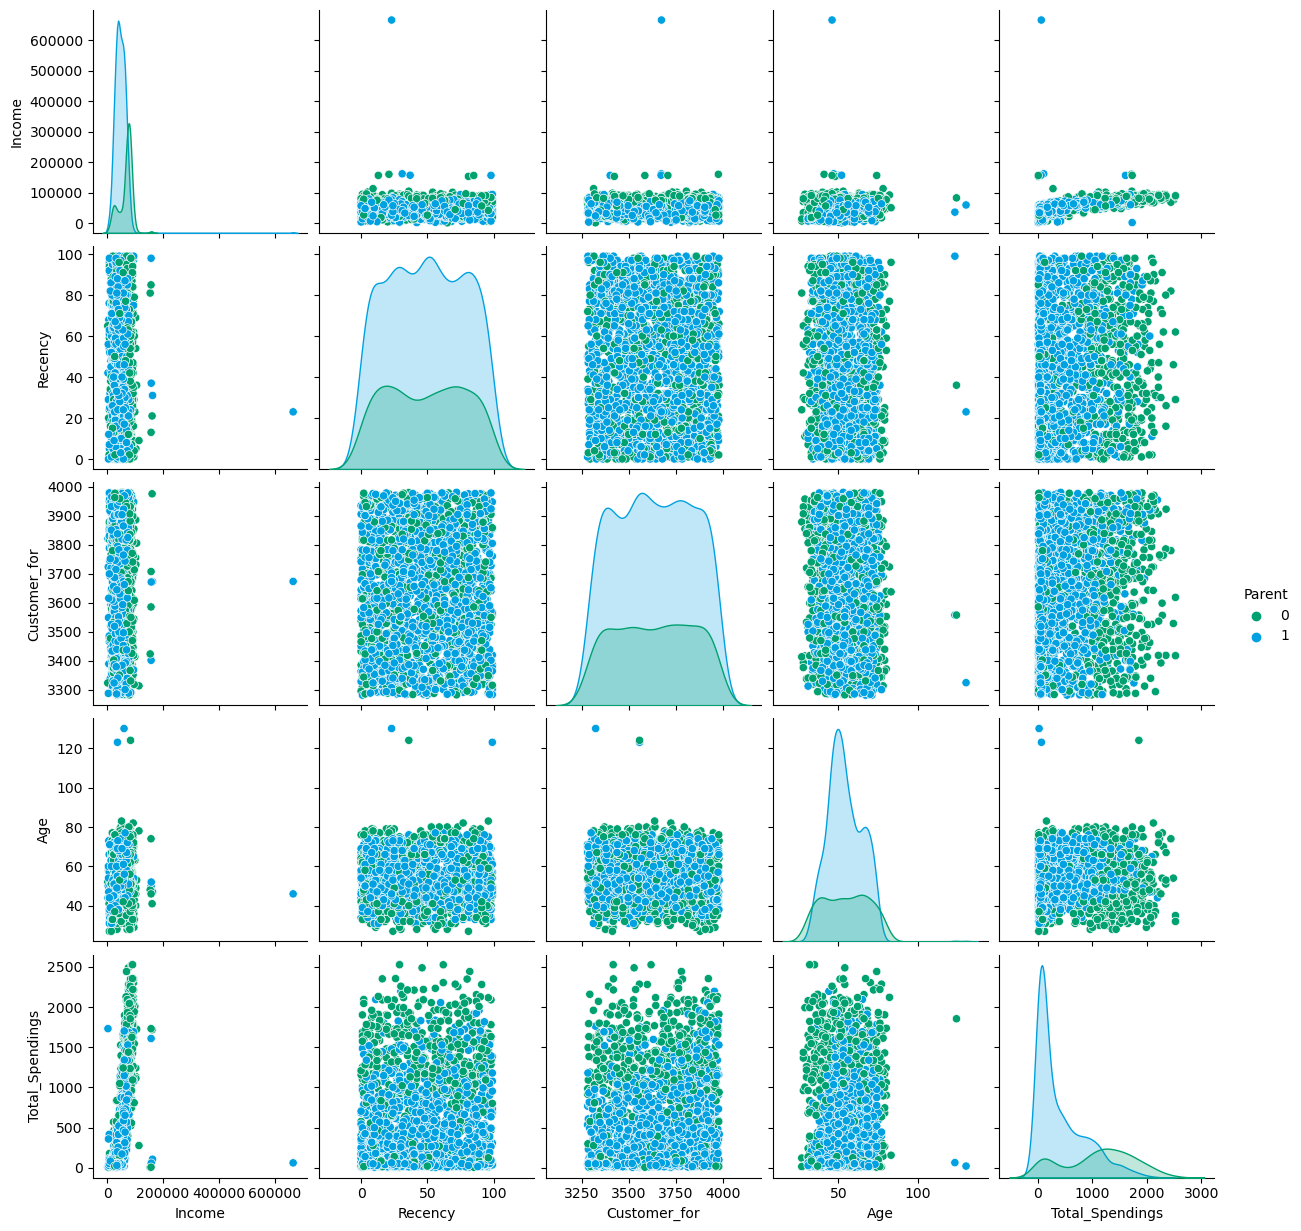

In [20]:
#plotting selected features
#choosing color palette: green and blue
colors = ['#00A170', '#00A1E0']
sns.set_palette(sns.color_palette(colors))
#features to plot
features = ["Income", "Recency", "Customer_for", "Age", "Total_Spendings", "Parent"]
plt.figure(figsize=(20, 15))
sns.pairplot(df[features], hue="Parent", palette=colors)
plt.show()

In [21]:
#setting a cap for income and age
df = df[(df['Income'] < 500000) & (df['Age'] < 80)]
print(len(df))

2204


<AxesSubplot:>

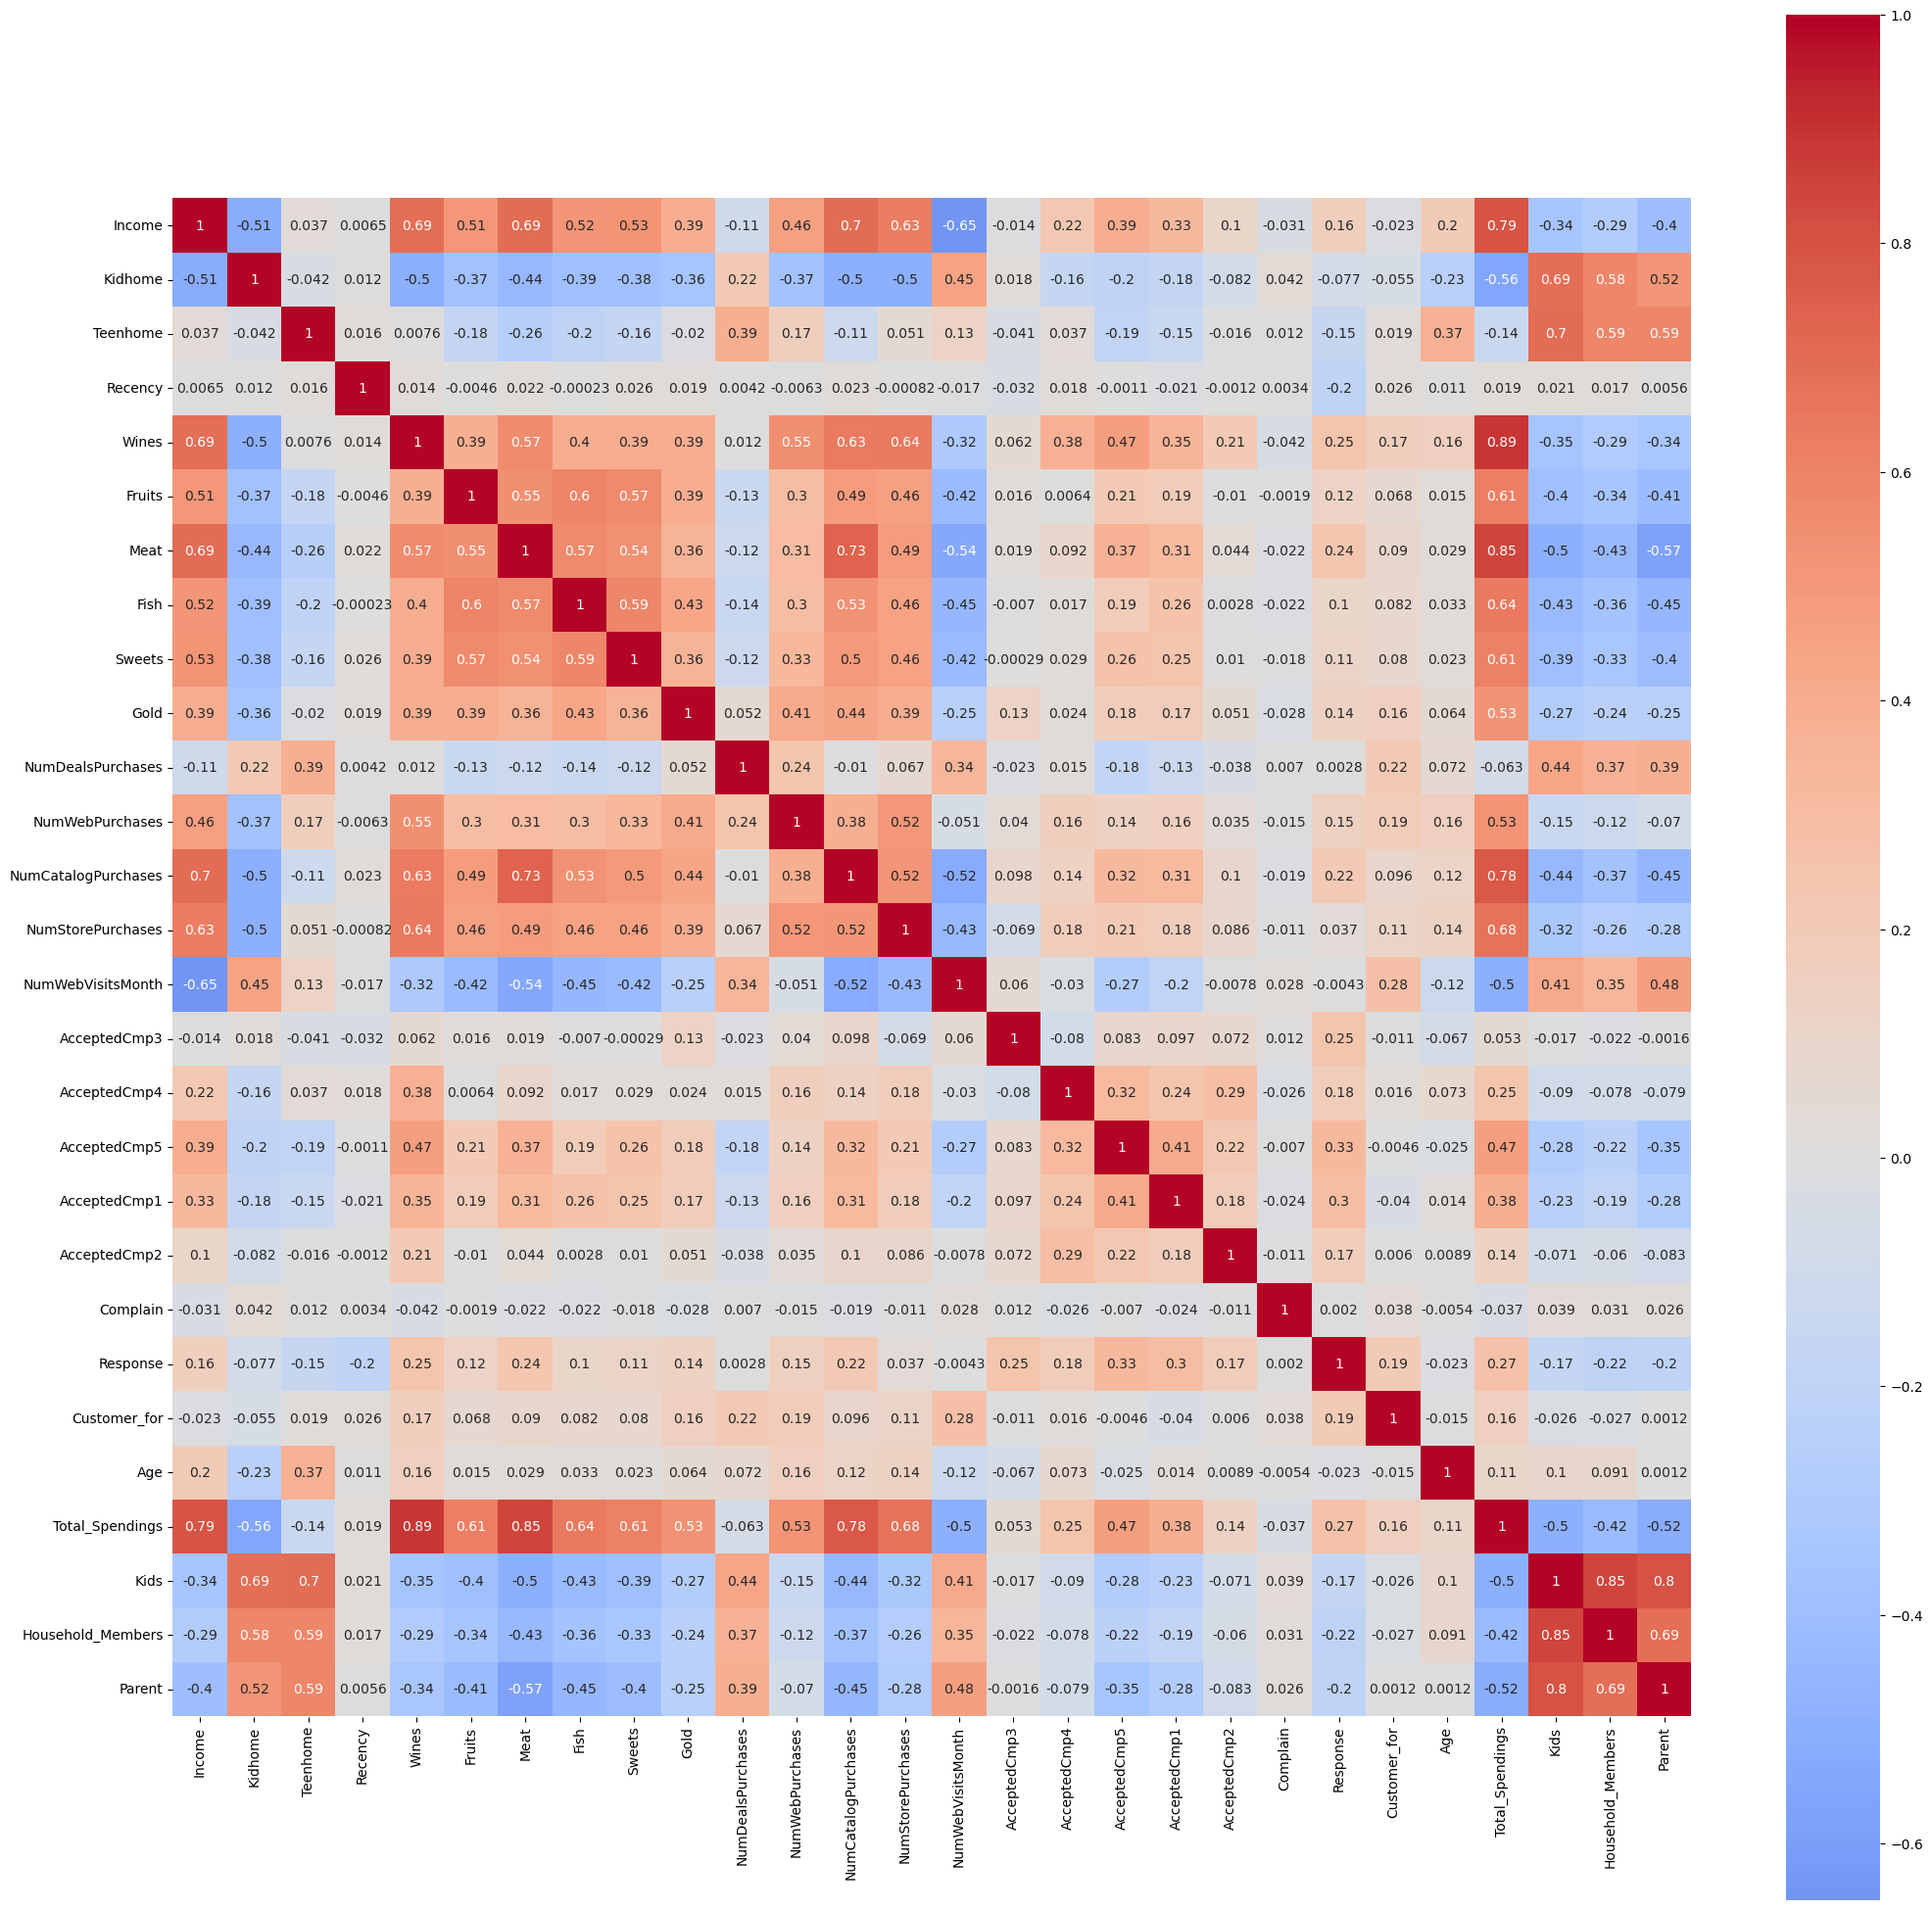

In [22]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)

In [23]:
#preprocessing data
#creating a copy of the dataframe
df_copy = df.copy()
#getting categorical columns
cat_cols = df_copy.select_dtypes(include=['object']).columns
cat_cols

Index(['Education', 'Living_With', 'Education_Segmentation'], dtype='object')

In [24]:
#encoding categorical columns
le = LabelEncoder()
for col in cat_cols:
    df_copy[col] = le.fit_transform(df_copy[col])
df_copy.head()


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_for,Age,Total_Spendings,Living_With,Kids,Household_Members,Parent,Education_Segmentation
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,1,3944,66,1617,0,0,1,0,2
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,3394,69,27,0,2,3,1,2
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,3593,58,776,1,0,2,0,2
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,3420,39,53,1,1,3,1,2
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,3442,42,422,1,1,3,1,0


In [25]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2204.0,2.390653,1.121054,0.0,2.00,2.0,3.00,4.0
Income,2204.0,51912.330309,21533.240415,1730.0,35191.50,51369.0,68468.25,162397.0
Kidhome,2204.0,0.443285,0.537268,0.0,0.00,0.0,1.00,2.0
Teenhome,2204.0,0.507713,0.544384,0.0,0.00,0.0,1.00,2.0
Recency,2204.0,48.957350,28.964486,0.0,24.00,49.0,74.00,99.0
Wines,2204.0,303.971416,336.498968,0.0,24.00,173.5,505.00,1493.0
Fruits,2204.0,26.357985,39.801189,0.0,2.00,8.0,33.00,199.0
Meat,2204.0,166.562160,224.131724,0.0,16.00,68.0,232.00,1725.0
Fish,2204.0,37.431034,54.642163,0.0,3.00,12.0,50.00,259.0
Sweets,2204.0,27.061252,41.135432,0.0,1.00,8.0,33.00,262.0


In [26]:
#print education segmentation and education columns
print(df_copy['Education_Segmentation'].value_counts())
print(df_copy['Education'].value_counts())

2    1115
0     837
1     252
Name: Education_Segmentation, dtype: int64
2    1115
4     474
3     363
0     198
1      54
Name: Education, dtype: int64


In [27]:
#drop education column
df_copy = df_copy.drop(['Education'], axis=1)

In [28]:
#dropping features on deals and promotions
df_copy = df_copy.drop(['Complain', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)

In [29]:
#scaling data
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_data = pd.DataFrame(scaler.transform(df_copy), columns=df_copy.columns)

In [30]:
scaled_data.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,Total_Spendings,Living_With,Kids,Household_Members,Parent,Education_Segmentation
0,0.289185,-0.825260,-0.932849,0.312269,0.983966,1.549100,1.693308,2.463290,1.481754,0.849985,...,-0.554429,0.690032,1.526165,1.034452,1.681199,-1.352504,-1.270584,-1.766768,-1.591242,0.937016
1,-0.258651,1.036432,0.904505,-0.378389,-0.870843,-0.637261,-0.716537,-0.648566,-0.633691,-0.733980,...,-1.170338,-0.134713,-1.187696,1.292849,-0.961206,-1.352504,1.401522,0.445079,0.628440,0.937016
2,0.915103,-0.825260,-0.932849,-0.792783,0.362724,0.569007,-0.176553,1.346683,-0.147382,-0.038581,...,1.293296,-0.547086,-0.205772,0.345390,0.283550,0.739369,-1.270584,-0.660845,-1.591242,0.937016
3,-1.173630,1.036432,-0.932849,-0.792783,-0.870843,-0.561869,-0.654059,-0.502126,-0.585060,-0.753296,...,-0.554429,0.277659,-1.059404,-1.291130,-0.917997,0.739369,0.065469,0.445079,0.628440,0.937016
4,0.296384,1.036432,-0.932849,1.555452,-0.389306,0.418223,-0.216717,0.156855,-0.001489,-0.560130,...,0.061479,-0.134713,-0.950850,-1.032732,-0.304759,0.739369,0.065469,0.445079,0.628440,-1.207514


In [31]:
#just in case, making a copy of the scaled data
scaled_data_copy = scaled_data.copy()

In [32]:
#reduce dimensionality with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_scaled_data = pd.DataFrame(pca.transform(scaled_data), columns=['PC1', 'PC2', 'PC3'])

In [33]:
PCA_scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2204.0,-1.249253e-17,2.877818,-5.968811,-2.528578,-0.781691,2.377886,7.472335
PC2,2204.0,-1.083022e-16,1.712989,-4.306726,-1.316396,-0.160537,1.248617,6.264727
PC3,2204.0,7.918651e-17,1.241448,-3.796142,-0.821697,-0.024629,0.850402,6.588517


In [34]:
PCA_scaled_data.head()

,PC1,PC2,PC3
0,4.991150,-0.262498,2.562024
1,-2.881537,-0.064666,-1.389462
2,2.616838,-0.815773,-0.112071
3,-2.653154,-1.576288,0.034337
4,-0.644368,0.251123,-0.120808


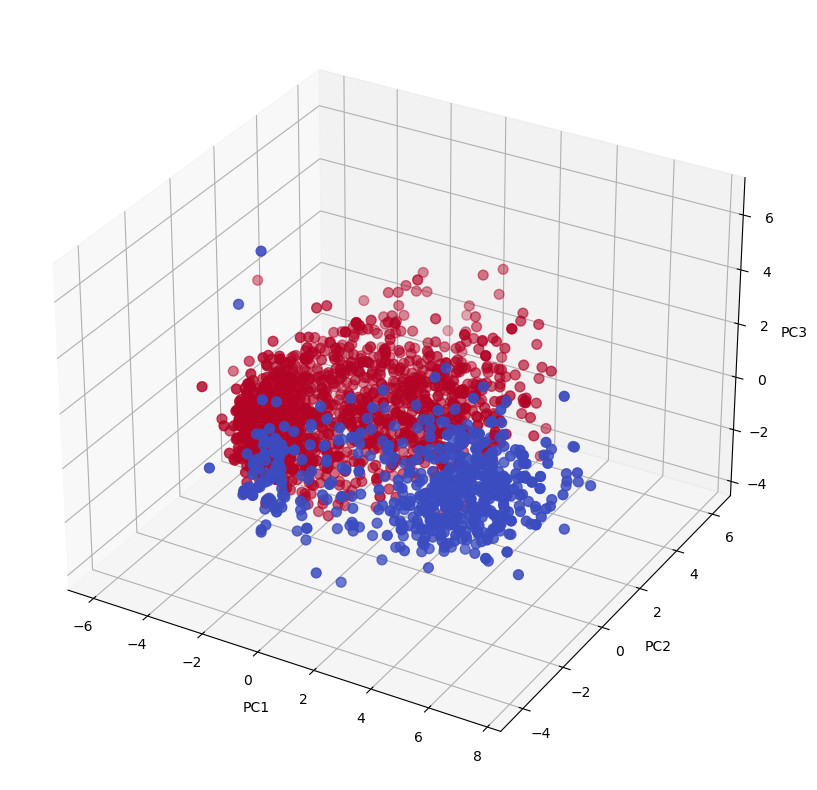

In [35]:
#3D plot of the PCA
x = PCA_scaled_data['PC1']
y = PCA_scaled_data['PC2']
z = PCA_scaled_data['PC3']
#plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=df_copy['Parent'], cmap='coolwarm', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

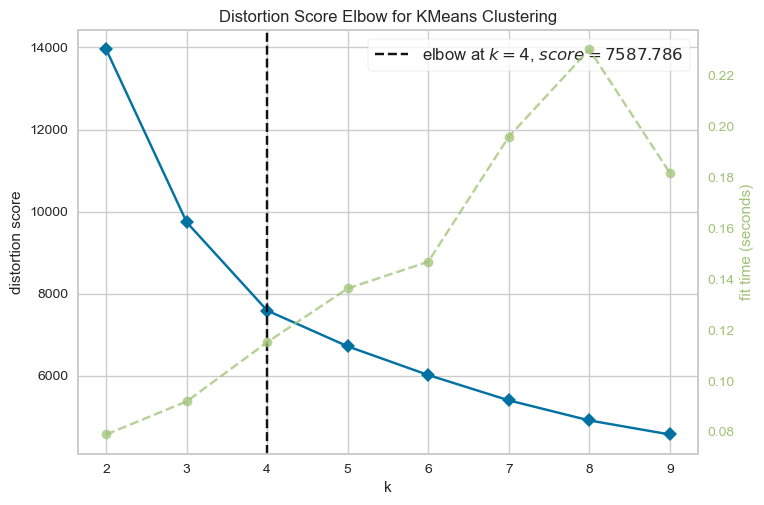

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
#clustering using elbow method
#examining elbow method to find the optimal number of clusters
#importing elbow visualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow = KElbowVisualizer(KMeans(), k=(2, 10))
elbow.fit(PCA_scaled_data)
elbow.show()


In [37]:
#aggolmerative clustering
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4)
#fitting the model
yhat_agg = agg.fit_predict(PCA_scaled_data)
PCA_scaled_data['Cluster'] = yhat_agg
df_copy['Cluster'] = yhat_agg


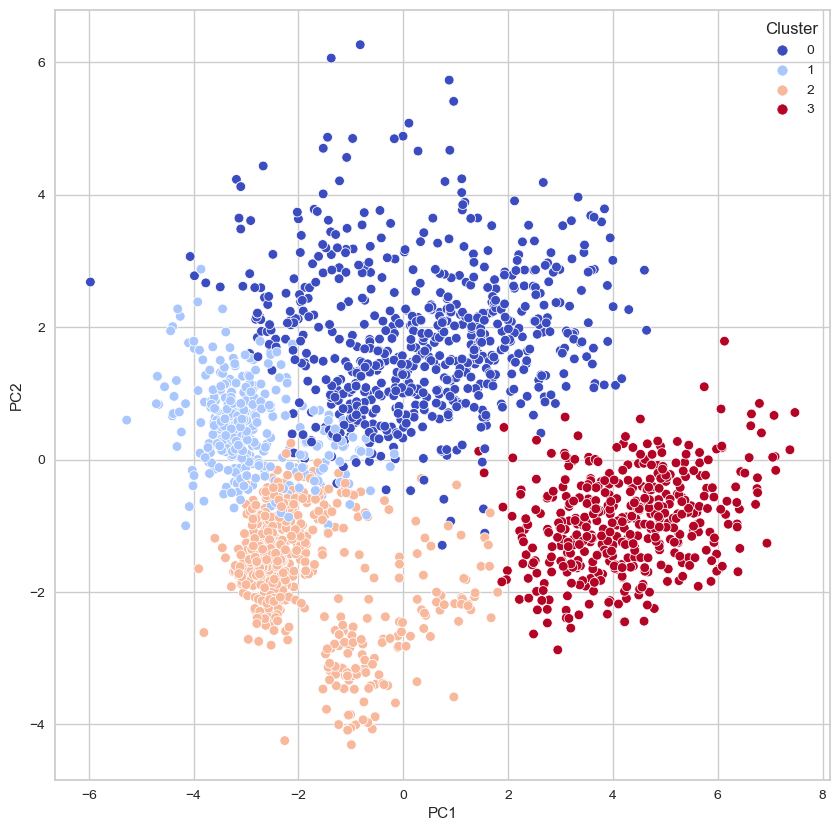

In [38]:
#plotting the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=PCA_scaled_data, palette='coolwarm')
plt.show()

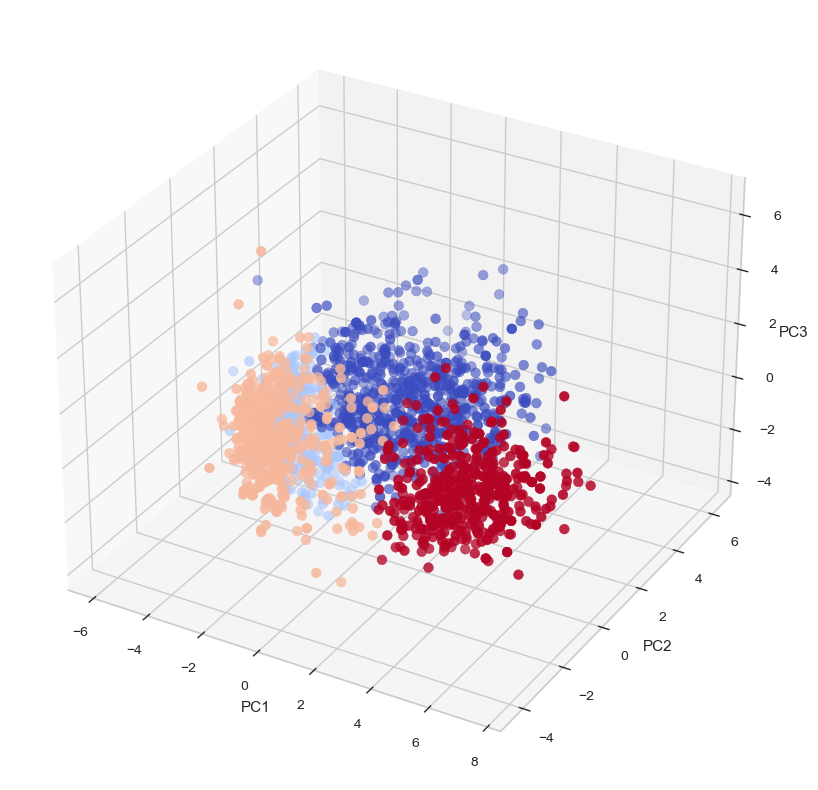

In [39]:
#plotting the clusters 3d
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=df_copy['Cluster'], cmap='coolwarm', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [40]:
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(PCA_scaled_data, yhat_agg)

0.3944761590610848

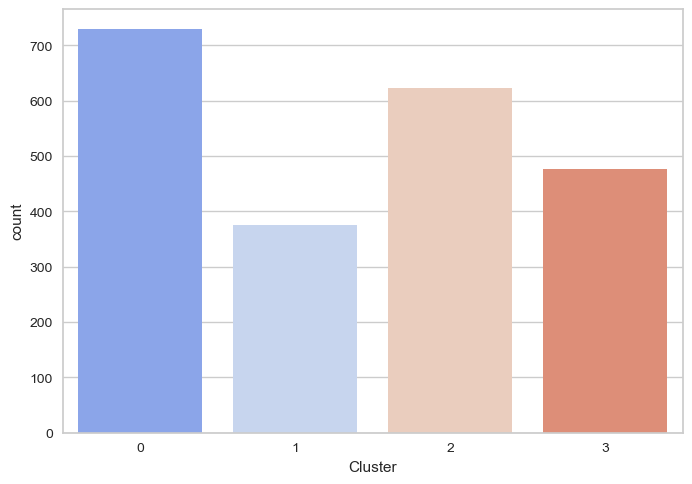

In [41]:
#Plotting countplot of clusters distribution
sns.countplot(x='Cluster', data=df_copy, palette='coolwarm')
plt.show()

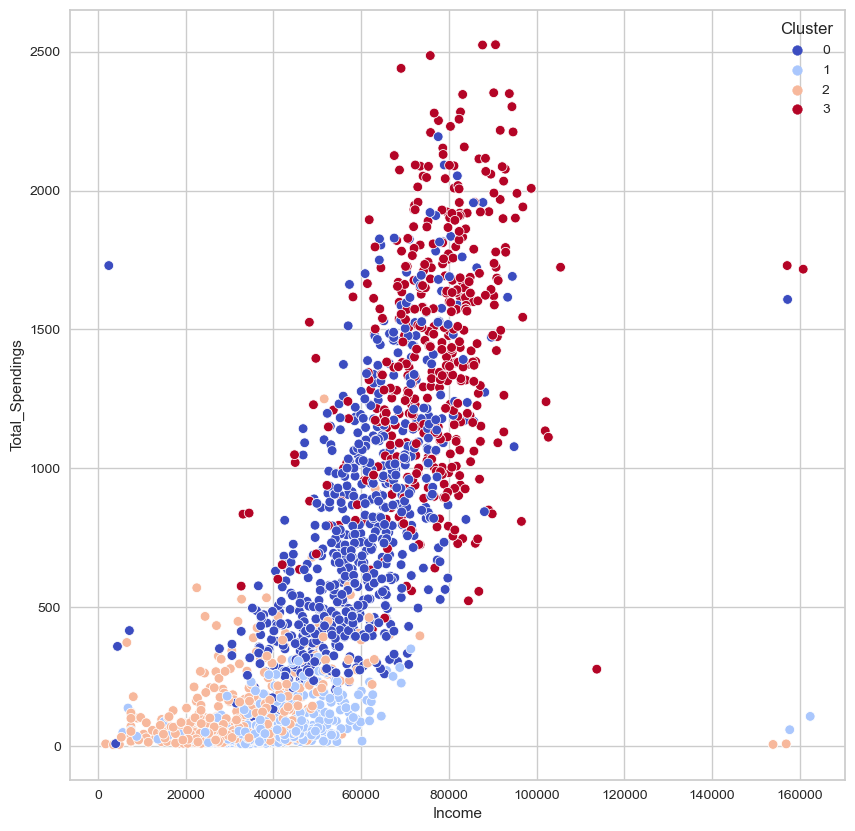

In [43]:
#plotting scatterplot of clusters distribution by based on income and spending
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Income', y='Total_Spendings', hue='Cluster', data=df_copy, palette='coolwarm')
plt.show()

d:\python\odyn\anak2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


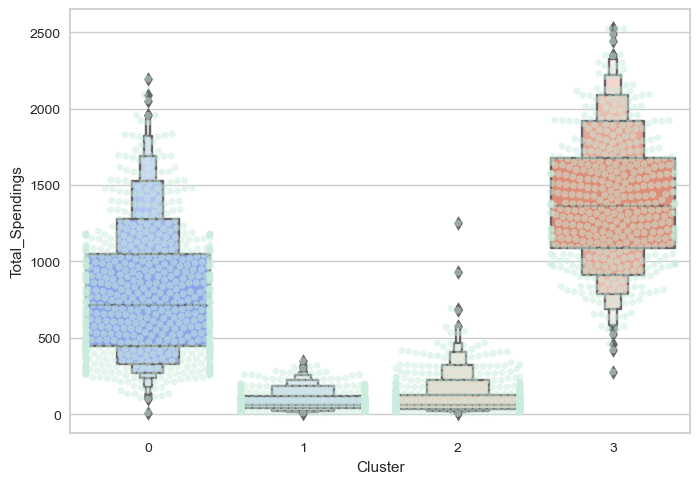

In [46]:
#distribution of clusters as per Wines, Fruits, Meat, Fish, Sweets and Gold
sns.swarmplot(x=df_copy["Cluster"], y=df_copy['Total_Spendings'], color= "#CBEDDD", alpha=0.5 )
sns.boxenplot(x=df_copy["Cluster"], y=df_copy['Total_Spendings'], palette='coolwarm')
plt.show()